In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2023-01-12"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2023_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2023-01-12   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425   Î∂ÄÏÇ∞ÏßÑÍµ¨   7425   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2023-01-12     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5800   Î∂ÄÏÇ∞ÏßÑÍµ¨   5800   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2023-01-12     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  12450   Î∂ÄÏÇ∞ÏßÑÍµ¨  12450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2023-01-12    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   6225   Î∂ÄÏÇ∞ÏßÑÍµ¨   6225   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2023-01-12     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   4590   Î∂ÄÏÇ∞ÏßÑÍµ¨   4590   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2023-01-12    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   9480   Î∂ÄÏÇ∞ÏßÑÍµ¨   9480   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2023-01-12     ÎåÄÌåå                      1.0„éè   3612   Î∂ÄÏÇ∞ÏßÑÍµ¨   3612   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2023-01-12   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  18900   Î∂ÄÏÇ∞ÏßÑÍµ¨  18900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2023-01-12     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5194   Î∂ÄÏÇ∞ÏßÑÍµ¨   5194   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2023-01-12     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    820   Î∂ÄÏÇ∞ÏßÑÍµ¨    820   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2023-01-12     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1580   Î∂ÄÏÇ∞ÏßÑÍµ¨   1580   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2023-01-12      Î¨¥                   2.0„éè 1Í∞ú   1800   Î∂ÄÏÇ∞ÏßÑÍµ¨   1800   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2023-01-12    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4600   Î∂ÄÏÇ∞ÏßÑÍµ¨   4600   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2023-01-12     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3480   Î∂ÄÏÇ∞ÏßÑÍµ¨   3480   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2023-01-12      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  19800   Î∂ÄÏÇ∞ÏßÑÍµ¨  19800   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2023-01-12     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2400   Î∂ÄÏÇ∞ÏßÑÍµ¨   2400   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2023-01-12  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©  10811   Î∂ÄÏÇ∞ÏßÑÍµ¨  10811   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2023-01-12   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  16480   Î∂ÄÏÇ∞ÏßÑÍµ¨  16480   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2023-01-12     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  10440   Î∂ÄÏÇ∞ÏßÑÍµ¨  10440   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2023-01-12    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2816   Î∂ÄÏÇ∞ÏßÑÍµ¨   2816   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2023-01-12     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1980   Î∂ÄÏÇ∞ÏßÑÍµ¨   1980   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2023-01-12     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380   Î∂ÄÏÇ∞ÏßÑÍµ¨   1380   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2023-01-12    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  55000   Î∂ÄÏÇ∞ÏßÑÍµ¨  55000   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2023-01-12    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   7680   Î∂ÄÏÇ∞ÏßÑÍµ¨   7680   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2023-01-12      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49900   Î∂ÄÏÇ∞ÏßÑÍµ¨  49900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2023-01-12     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   3733   Î∂ÄÏÇ∞ÏßÑÍµ¨   3733   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2023-01-12    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   7900   Î∂ÄÏÇ∞ÏßÑÍµ¨   7900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2023-01-12     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    932   Î∂ÄÏÇ∞ÏßÑÍµ¨    932   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2023-01-12    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   9280   Î∂ÄÏÇ∞ÏßÑÍµ¨   9280   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2023-01-12   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   3000   Î∂ÄÏÇ∞ÏßÑÍµ¨   3000   Î∂ÄÏÇ∞ÏßÑÍµ¨   
30  2023-01-12     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2580   Î∂ÄÏÇ∞ÏßÑÍµ¨   2580   Î∂ÄÏÇ∞ÏßÑÍµ¨   
31  2023-01-12    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  27000   Î∂ÄÏÇ∞ÏßÑÍµ¨  27000   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%   7,425  
1      0    0.0%   5,800  
2      0    0.0%  12,450  
3      0    0.0%   6,225  
4      0    0.0%   4,590  
5      0    0.0%   9,480  
6      0    0.0%   3,612  
7      0    0.0%  18,900  
8      0    0.0%   5,194  
9      0    0.0% 

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2023-04-13"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2023_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2023-04-13   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8625   Î∂ÄÏÇ∞ÏßÑÍµ¨   8625   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2023-04-13     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5800   Î∂ÄÏÇ∞ÏßÑÍµ¨   5800   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2023-04-13     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  11000   Î∂ÄÏÇ∞ÏßÑÍµ¨  11000   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2023-04-13    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   5612   Î∂ÄÏÇ∞ÏßÑÍµ¨   5612   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2023-04-13     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3990   Î∂ÄÏÇ∞ÏßÑÍµ¨   3990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2023-04-13    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6612   Î∂ÄÏÇ∞ÏßÑÍµ¨   6612   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2023-04-13     ÎåÄÌåå                      1.0„éè   2790   Î∂ÄÏÇ∞ÏßÑÍµ¨   2790   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2023-04-13   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  19450   Î∂ÄÏÇ∞ÏßÑÍµ¨  19450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2023-04-13     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5194   Î∂ÄÏÇ∞ÏßÑÍµ¨   5194   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2023-04-13     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    820   Î∂ÄÏÇ∞ÏßÑÍµ¨    820   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2023-04-13     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1580   Î∂ÄÏÇ∞ÏßÑÍµ¨   1580   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2023-04-13      Î¨¥                   2.0„éè 1Í∞ú    990   Î∂ÄÏÇ∞ÏßÑÍµ¨    990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2023-04-13    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4600   Î∂ÄÏÇ∞ÏßÑÍµ¨   4600   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2023-04-13     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   8250   Î∂ÄÏÇ∞ÏßÑÍµ¨   8250   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2023-04-13      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  21800   Î∂ÄÏÇ∞ÏßÑÍµ¨  21800   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2023-04-13     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2023-04-13  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   8500   Î∂ÄÏÇ∞ÏßÑÍµ¨   8500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2023-04-13   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  16480   Î∂ÄÏÇ∞ÏßÑÍµ¨  16480   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2023-04-13     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  10788   Î∂ÄÏÇ∞ÏßÑÍµ¨  10788   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2023-04-13    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2816   Î∂ÄÏÇ∞ÏßÑÍµ¨   2816   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2023-04-13     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1980   Î∂ÄÏÇ∞ÏßÑÍµ¨   1980   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2023-04-13     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380   Î∂ÄÏÇ∞ÏßÑÍµ¨   1380   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2023-04-13    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  39500   Î∂ÄÏÇ∞ÏßÑÍµ¨  39500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2023-04-13    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   8480   Î∂ÄÏÇ∞ÏßÑÍµ¨   8480   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2023-04-13      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  44900   Î∂ÄÏÇ∞ÏßÑÍµ¨  44900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2023-04-13     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2506   Î∂ÄÏÇ∞ÏßÑÍµ¨   2506   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2023-04-13    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   4450   Î∂ÄÏÇ∞ÏßÑÍµ¨   4450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2023-04-13     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    932   Î∂ÄÏÇ∞ÏßÑÍµ¨    932   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2023-04-13    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë  10600   Î∂ÄÏÇ∞ÏßÑÍµ¨  10600   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2023-04-13   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   3000   Î∂ÄÏÇ∞ÏßÑÍµ¨   3000   Î∂ÄÏÇ∞ÏßÑÍµ¨   
30  2023-04-13     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3730   Î∂ÄÏÇ∞ÏßÑÍµ¨   3730   Î∂ÄÏÇ∞ÏßÑÍµ¨   
31  2023-04-13    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  34000   Î∂ÄÏÇ∞ÏßÑÍµ¨  34000   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%   8,625  
1      0    0.0%   5,800  
2      0    0.0%  11,000  
3      0    0.0%   5,612  
4      0    0.0%   3,990  
5      0    0.0%   6,612  
6      0    0.0%   2,790  
7      0    0.0%  19,450  
8      0    0.0%   5,194  
9      0    0.0% 

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2023-07-13"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2023_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2023-07-13   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425   Î∂ÄÏÇ∞ÏßÑÍµ¨   7425   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2023-07-13     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5800   Î∂ÄÏÇ∞ÏßÑÍµ¨   5800   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2023-07-13     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   9900   Î∂ÄÏÇ∞ÏßÑÍµ¨   9900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2023-07-13    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4428   Î∂ÄÏÇ∞ÏßÑÍµ¨   4428   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2023-07-13     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3990   Î∂ÄÏÇ∞ÏßÑÍµ¨   3990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2023-07-13    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   9991   Î∂ÄÏÇ∞ÏßÑÍµ¨   9991   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2023-07-13     ÎåÄÌåå                      1.0„éè   4112   Î∂ÄÏÇ∞ÏßÑÍµ¨   4112   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2023-07-13   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  20950   Î∂ÄÏÇ∞ÏßÑÍµ¨  20950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2023-07-13     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5194   Î∂ÄÏÇ∞ÏßÑÍµ¨   5194   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2023-07-13     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    780   Î∂ÄÏÇ∞ÏßÑÍµ¨    780   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2023-07-13     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1580   Î∂ÄÏÇ∞ÏßÑÍµ¨   1580   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2023-07-13      Î¨¥                   2.0„éè 1Í∞ú   3380   Î∂ÄÏÇ∞ÏßÑÍµ¨   3380   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2023-07-13    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4600   Î∂ÄÏÇ∞ÏßÑÍµ¨   4600   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2023-07-13     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú  11240   Î∂ÄÏÇ∞ÏßÑÍµ¨  11240   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2023-07-13      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  29970   Î∂ÄÏÇ∞ÏßÑÍµ¨  29970   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2023-07-13     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2990   Î∂ÄÏÇ∞ÏßÑÍµ¨   2990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2023-07-13  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   9500   Î∂ÄÏÇ∞ÏßÑÍµ¨   9500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2023-07-13   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  16480   Î∂ÄÏÇ∞ÏßÑÍµ¨  16480   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2023-07-13     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  32076   Î∂ÄÏÇ∞ÏßÑÍµ¨  32076   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2023-07-13    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2816   Î∂ÄÏÇ∞ÏßÑÍµ¨   2816   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2023-07-13     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1980   Î∂ÄÏÇ∞ÏßÑÍµ¨   1980   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2023-07-13     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380   Î∂ÄÏÇ∞ÏßÑÍµ¨   1380   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2023-07-13    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  54900   Î∂ÄÏÇ∞ÏßÑÍµ¨  54900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2023-07-13    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   8480   Î∂ÄÏÇ∞ÏßÑÍµ¨   8480   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2023-07-13      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49900   Î∂ÄÏÇ∞ÏßÑÍµ¨  49900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2023-07-13     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2800   Î∂ÄÏÇ∞ÏßÑÍµ¨   2800   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2023-07-13    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   6237   Î∂ÄÏÇ∞ÏßÑÍµ¨   6237   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2023-07-13     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    932   Î∂ÄÏÇ∞ÏßÑÍµ¨    932   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2023-07-13    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë  10600   Î∂ÄÏÇ∞ÏßÑÍµ¨  10600   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2023-07-13   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   3000   Î∂ÄÏÇ∞ÏßÑÍµ¨   3000   Î∂ÄÏÇ∞ÏßÑÍµ¨   
30  2023-07-13     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3730   Î∂ÄÏÇ∞ÏßÑÍµ¨   3730   Î∂ÄÏÇ∞ÏßÑÍµ¨   
31  2023-07-13    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  24900   Î∂ÄÏÇ∞ÏßÑÍµ¨  24900   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%   7,425  
1      0    0.0%   5,800  
2      0    0.0%   9,900  
3      0    0.0%   4,428  
4      0    0.0%   3,990  
5      0    0.0%   9,991  
6      0    0.0%   4,112  
7      0    0.0%  20,950  
8      0    0.0%   5,194  
9      0    0.0% 

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2023-10-12"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2023_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2023-10-12   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425   Î∂ÄÏÇ∞ÏßÑÍµ¨   7425   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2023-10-12     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5800   Î∂ÄÏÇ∞ÏßÑÍµ¨   5800   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2023-10-12     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  12000   Î∂ÄÏÇ∞ÏßÑÍµ¨  12000   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2023-10-12    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4987   Î∂ÄÏÇ∞ÏßÑÍµ¨   4987   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2023-10-12     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3990   Î∂ÄÏÇ∞ÏßÑÍµ¨   3990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2023-10-12    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   9158   Î∂ÄÏÇ∞ÏßÑÍµ¨   9158   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2023-10-12     ÎåÄÌåå                      1.0„éè   4487   Î∂ÄÏÇ∞ÏßÑÍµ¨   4487   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2023-10-12   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  21450   Î∂ÄÏÇ∞ÏßÑÍµ¨  21450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2023-10-12     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5670   Î∂ÄÏÇ∞ÏßÑÍµ¨   5670   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2023-10-12     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    780   Î∂ÄÏÇ∞ÏßÑÍµ¨    780   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2023-10-12     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1580   Î∂ÄÏÇ∞ÏßÑÍµ¨   1580   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2023-10-12      Î¨¥                   2.0„éè 1Í∞ú   2580   Î∂ÄÏÇ∞ÏßÑÍµ¨   2580   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2023-10-12    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4420   Î∂ÄÏÇ∞ÏßÑÍµ¨   4420   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2023-10-12     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   9270   Î∂ÄÏÇ∞ÏßÑÍµ¨   9270   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2023-10-12      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  31800   Î∂ÄÏÇ∞ÏßÑÍµ¨  31800   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2023-10-12     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   6800   Î∂ÄÏÇ∞ÏßÑÍµ¨   6800   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2023-10-12  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   8900   Î∂ÄÏÇ∞ÏßÑÍµ¨   8900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2023-10-12   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  16480   Î∂ÄÏÇ∞ÏßÑÍµ¨  16480   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2023-10-12     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  32076   Î∂ÄÏÇ∞ÏßÑÍµ¨  32076   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2023-10-12    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316   Î∂ÄÏÇ∞ÏßÑÍµ¨   2316   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2023-10-12     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   2380   Î∂ÄÏÇ∞ÏßÑÍµ¨   2380   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2023-10-12     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380   Î∂ÄÏÇ∞ÏßÑÍµ¨   1380   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2023-10-12    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  59900   Î∂ÄÏÇ∞ÏßÑÍµ¨  59900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2023-10-12    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   8480   Î∂ÄÏÇ∞ÏßÑÍµ¨   8480   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2023-10-12      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  63900   Î∂ÄÏÇ∞ÏßÑÍµ¨  63900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2023-10-12     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   3326   Î∂ÄÏÇ∞ÏßÑÍµ¨   3326   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2023-10-12    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   4000   Î∂ÄÏÇ∞ÏßÑÍµ¨   4000   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2023-10-12     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    932   Î∂ÄÏÇ∞ÏßÑÍµ¨    932   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2023-10-12    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë  10600   Î∂ÄÏÇ∞ÏßÑÍµ¨  10600   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2023-10-12   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   3000   Î∂ÄÏÇ∞ÏßÑÍµ¨   3000   Î∂ÄÏÇ∞ÏßÑÍµ¨   
30  2023-10-12     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2980   Î∂ÄÏÇ∞ÏßÑÍµ¨   2980   Î∂ÄÏÇ∞ÏßÑÍµ¨   
31  2023-10-12    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  34000   Î∂ÄÏÇ∞ÏßÑÍµ¨  34000   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%   7,425  
1      0    0.0%   5,800  
2      0    0.0%  12,000  
3      0    0.0%   4,987  
4      0    0.0%   3,990  
5      0    0.0%   9,158  
6      0    0.0%   4,487  
7      0    0.0%  21,450  
8      0    0.0%   5,670  
9      0    0.0% 

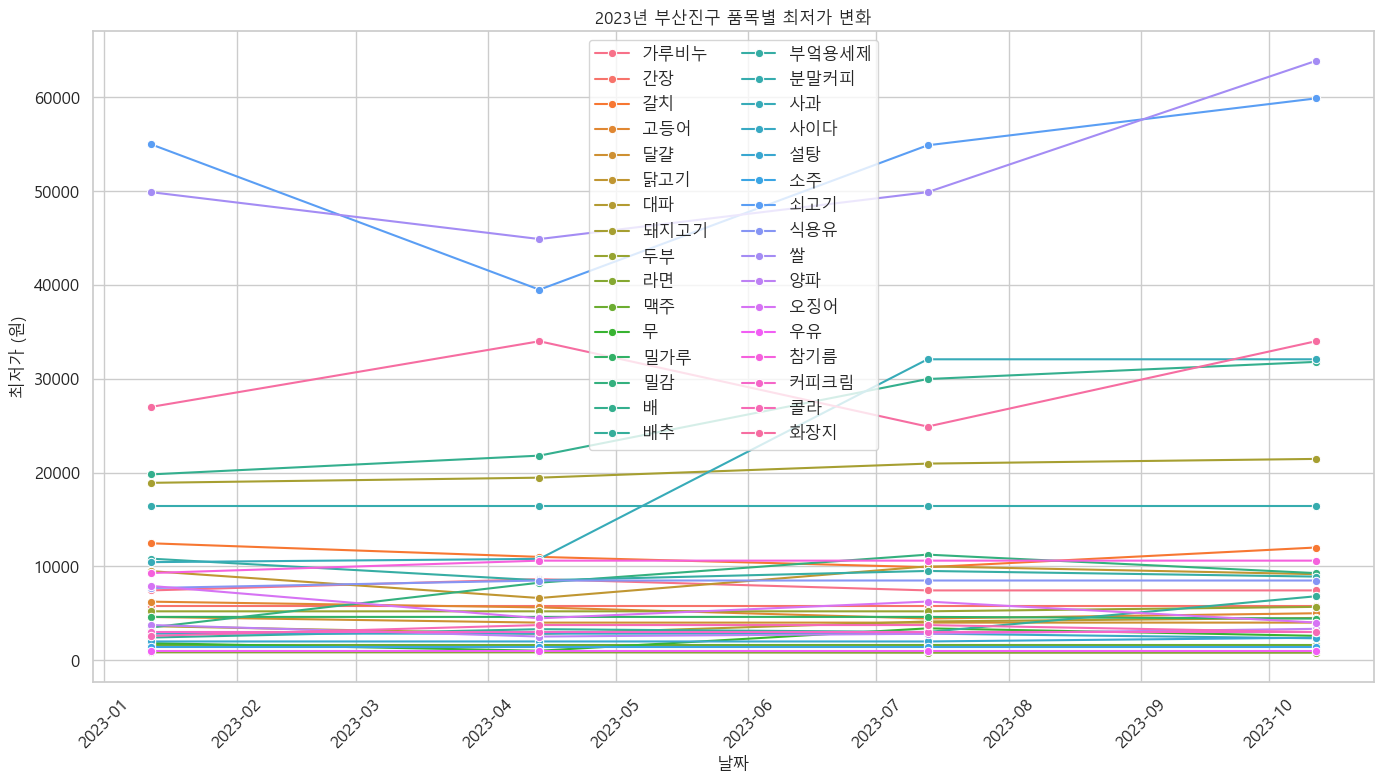

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2023_1q.csv")
q2 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2023_2q.csv")
q3 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2023_3q.csv")
q4 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2023_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2023ÎÖÑ Î∂ÄÏÇ∞ÏßÑÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2023_min.csv", index=False, encoding="utf-8-sig")

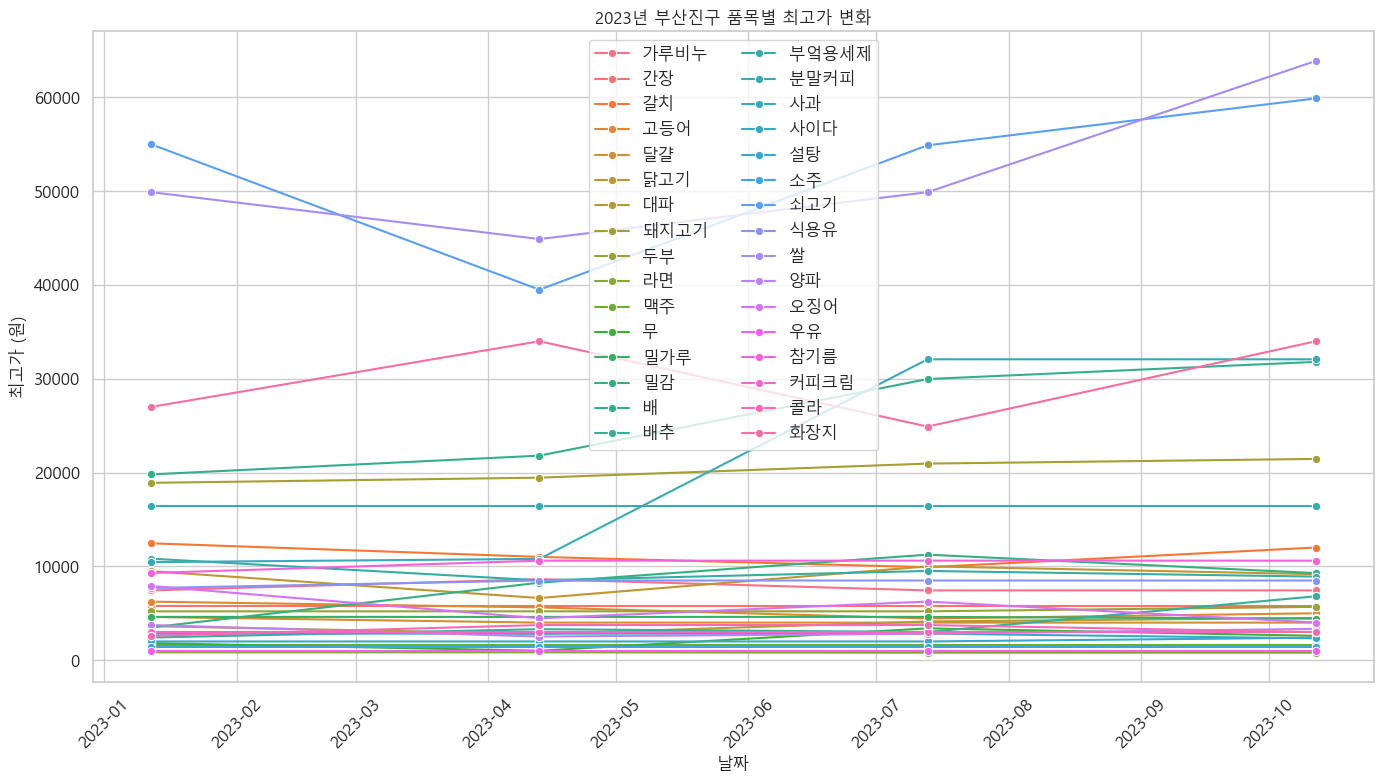

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2023_1q.csv")
q2 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2023_2q.csv")
q3 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2023_3q.csv")
q4 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2023_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2023ÎÖÑ Î∂ÄÏÇ∞ÏßÑÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2023_max.csv", index=False, encoding="utf-8-sig")